In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Model


### Now we will select the feature selection to traing the models and select the best model according to best score

In [4]:
df = pd.read_csv('../clean-data/finalDataset.csv')
df

,country,region,happiness_rank,happiness_score,standard_error,gdp,family,life_expectancy,freedom,government_trust,generosity,dystopia_residual,year,lower_confidence_interval,upper_confidence_interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019,NaN,NaN
778,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019,NaN,NaN
779,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019,NaN,NaN
780,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019,NaN,NaN


In [5]:
df = df[['happiness_score', 'gdp','family','life_expectancy','freedom','government_trust','generosity']]
df

,happiness_score,gdp,family,life_expectancy,freedom,government_trust,generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
777,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


## Correlation matrix

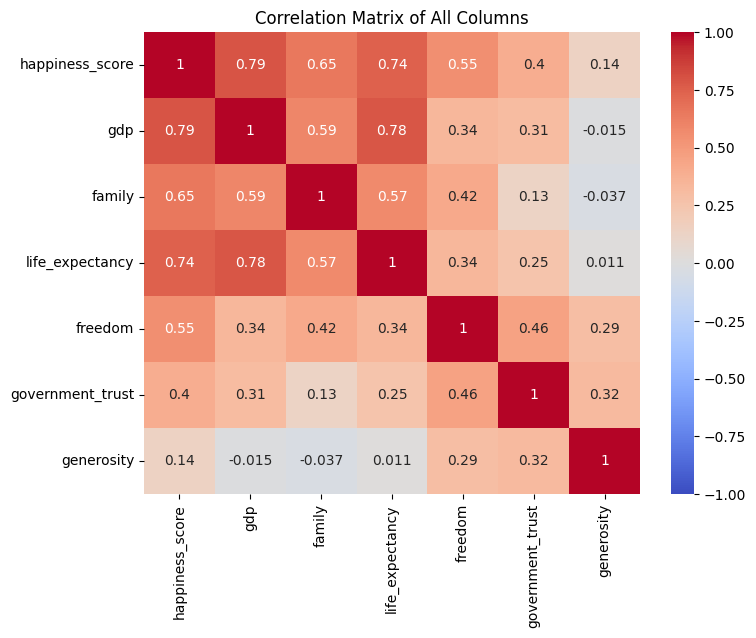

In [7]:
# Calcular la matriz de correlación para todas las columnas numéricas
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of All Columns")
plt.show()

### We check if the dataset has any null, as we can see it only has 1, then it is deleted directly. 

In [ ]:
null_counts = df.isnull().sum()

print(null_counts)

happiness_score     0
gdp                 0
family              0
life_expectancy     0
freedom             0
government_trust    1
generosity          0
dtype: int64


In [ ]:
df = df.dropna()

## Import sklearn libraries


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
X = df.drop('happiness_score', axis=1)  
y = df['happiness_score']  

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\n========== {name} ==========")
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R^2: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')



========== Linear Regression ==========
Mean Squared Error (MSE): 0.309824650958382
R^2: 0.7518804887905026
Mean Absolute Error (MAE): 0.43214584081745866

========== Lasso Regression ==========
Mean Squared Error (MSE): 0.4879262664560984
R^2: 0.6092498567661606
Mean Absolute Error (MAE): 0.5463957355538125

========== Ridge Regression ==========
Mean Squared Error (MSE): 0.30719565413260436
R^2: 0.7539858906859473
Mean Absolute Error (MAE): 0.43147215094277



========== Random Forest ==========
Mean Squared Error (MSE): 0.2385961209682197
R^2: 0.8089230384735623
Mean Absolute Error (MAE): 0.3813074026961888

========== Gradient Boosting ==========
Mean Squared Error (MSE): 0.268155112075604
R^2: 0.7852510601376769
Mean Absolute Error (MAE): 0.4043956541043871


## Saving the model and the dataset used for model training 

In [ ]:
import joblib

df.to_csv("../clean-data/modelDataset.csv", index=False)  
print("Dataset saved as 'modelDataset.csv'")

joblib.dump(models['Random Forest'], '../model/random_forest.pkl')
print("Random Forest model saved as 'random_forest.pkl'")

Dataset saved as 'modelDataset.csv'
Random Forest model saved as 'random_forest.pkl'
